<a href="https://colab.research.google.com/github/hojun1105/git-practice/blob/main/bike_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Fields
    datetime - hourly date + timestamp  
    season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
    holiday - whether the day is considered a holiday
    workingday - whether the day is neither a weekend nor holiday
    weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    temp - temperature in Celsius
    atemp - "feels like" temperature in Celsius
    humidity - relative humidity
    windspeed - wind speed
    casual - number of non-registered user rentals initiated
    registered - number of registered user rentals initiated
    count - number of total rentals

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
bike_train=pd.read_csv("/content/drive/MyDrive/package/train.csv")
bike_train_copy=bike_train.copy()
bike_train_copy.tail()

Mounted at /content/drive


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
bike_test=pd.read_csv("/content/drive/MyDrive/package/test.csv")

In [ ]:
bike_train_copy.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

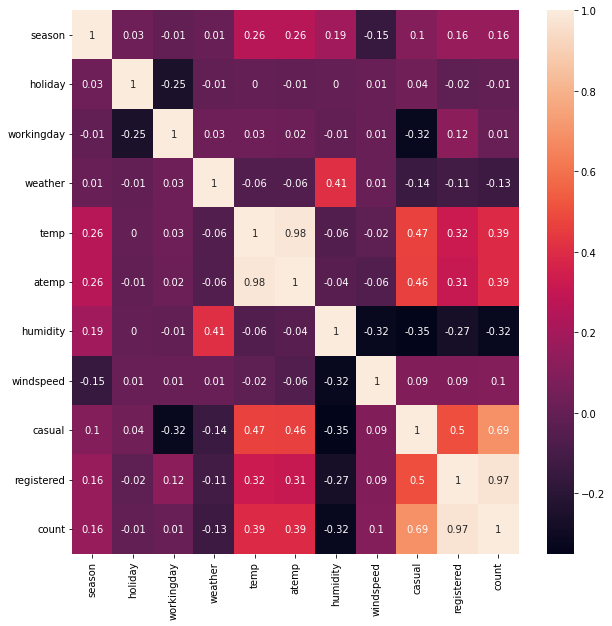

In [ ]:
plt.figure(figsize=(10,10))
bk_corr=bike_train_copy.corr().round(2)
bk_heatmap=sns.heatmap(data=bk_corr, annot=True )

In [ ]:
bike_train_copy.describe() #describe확인.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2febd5cd10>,
      dtype=object)

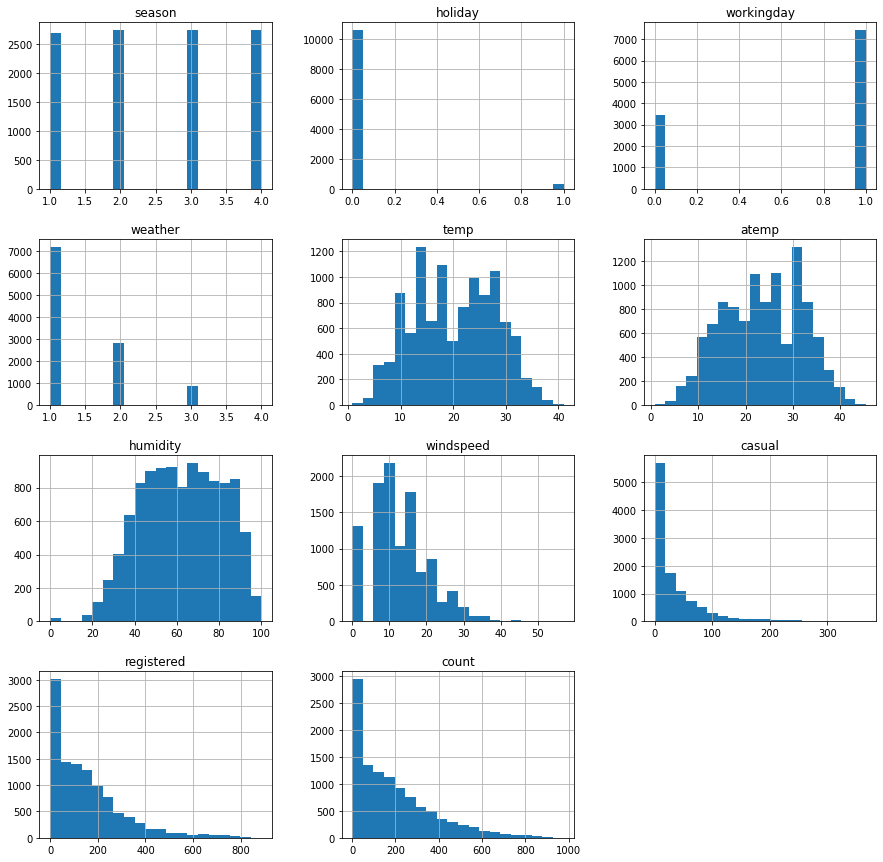

In [ ]:
bike_train_copy.hist(bins=20,figsize=(15,15))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


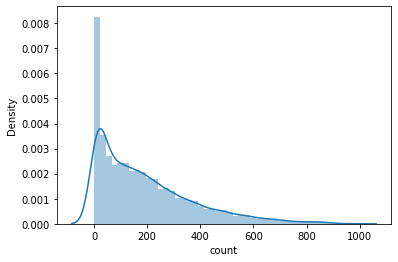

In [ ]:
sns.distplot(bike_train_copy['count'])

# object를 datetime으로 만들어서 슬라이싱
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221603462366

In [ ]:
bike_train_copy["datetime"] = pd.to_datetime(bike_train_copy["datetime"])

In [ ]:
bike_train_copy["datetime"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   10886
unique                  10886
top       2011-01-01 00:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

In [ ]:
bike_train_copy["year"]=bike_train_copy["datetime"].dt.year #년
bike_train_copy["month"]=bike_train_copy["datetime"].dt.month #월
bike_train_copy["day"]=bike_train_copy["datetime"].dt.day #일
bike_train_copy["hour"]=bike_train_copy["datetime"].dt.hour #시간
bike_train_copy["dayofweek"]=bike_train_copy["datetime"].dt.weekday #요일

In [ ]:
bike_train_copy

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [ ]:
bike_train_copy["dayofweek"].value_counts().sort_values() #각 요일의 개수 & sort_values로 작 -> 큼

4    1529
1    1539
0    1551
2    1551
3    1553
6    1579
5    1584
Name: dayofweek, dtype: int64

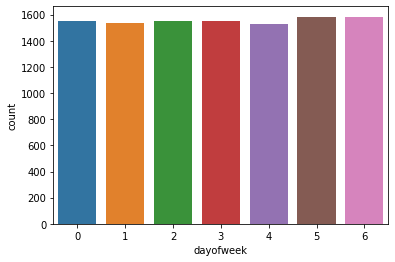

In [ ]:
sns.countplot(data=bike_train_copy, x="dayofweek")

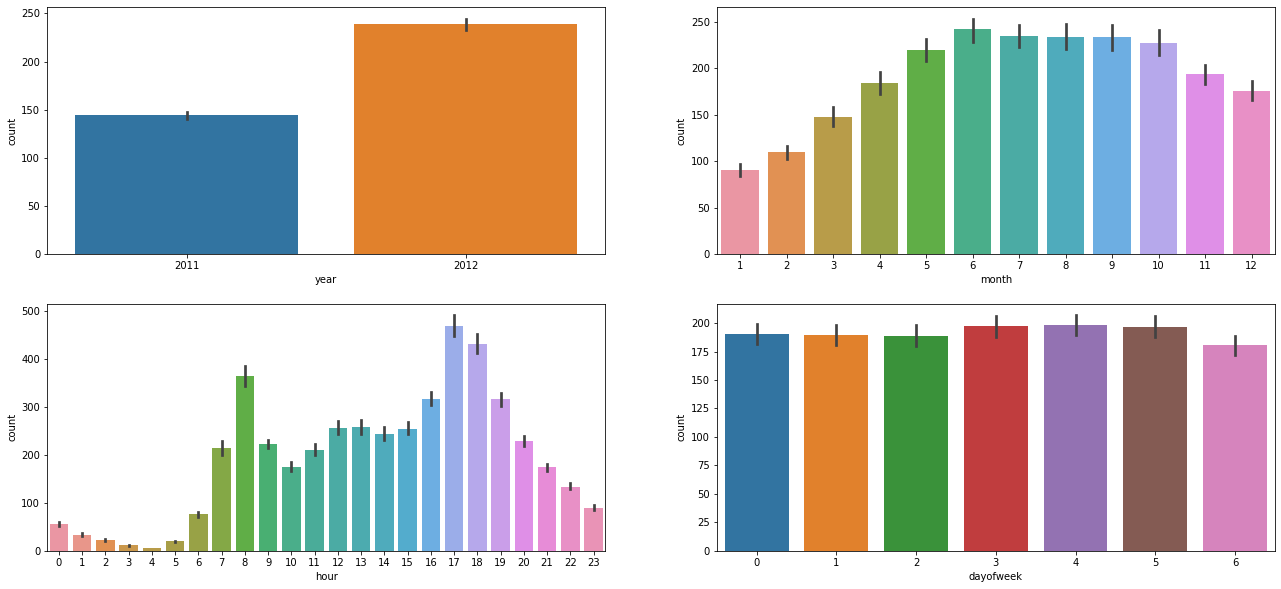

In [ ]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(22,10)
sns.barplot(data=bike_train_copy, x="year", y="count", ax=ax1)
sns.barplot(data=bike_train_copy, x="month", y="count", ax=ax2)
sns.barplot(data=bike_train_copy, x="hour", y="count", ax=ax3)
sns.barplot(data=bike_train_copy, x="dayofweek", y="count", ax=ax4)

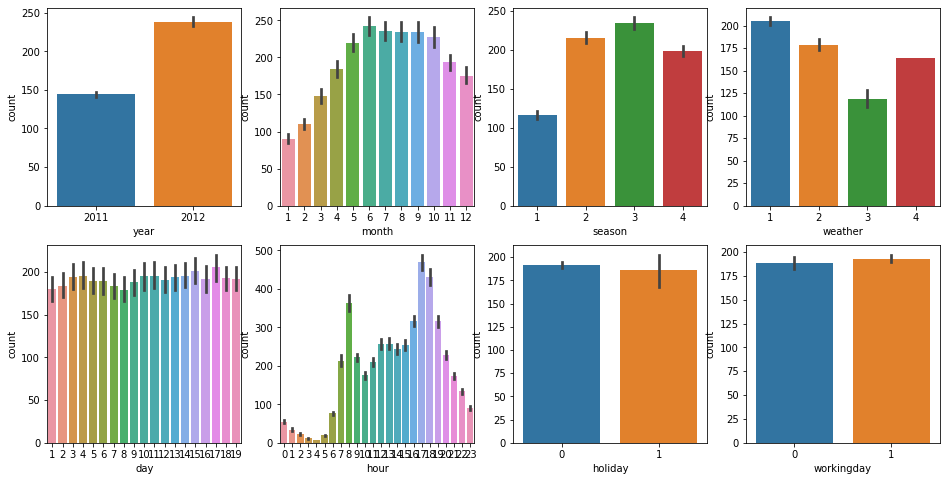

In [ ]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
c_feature = ['year','month','season','weather','day','hour','holiday','workingday']

for i, feature in enumerate(c_feature):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data=bike_train_copy, ax=axs[row][col])


In [ ]:
bins=[-1,5,11,17,24]
group_names=["dawn","morning","afternoon","night"]
hour_cats=pd.cut(bike_train_copy["hour"], bins, labels=group_names)

In [ ]:
hour_cats

0         dawn
1         dawn
2         dawn
3         dawn
4         dawn
         ...  
10881    night
10882    night
10883    night
10884    night
10885    night
Name: hour, Length: 10886, dtype: category
Categories (4, object): ['dawn' < 'morning' < 'afternoon' < 'night']

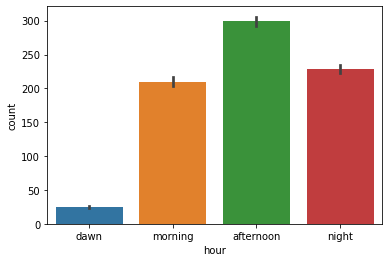

In [ ]:
sns.barplot(data=bike_train_copy , x=hour_cats, y="count")

In [ ]:
bike_train_copy

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [ ]:
bike_train_copy.drop(["atemp","datetime","casual","registered"], axis=1) #필요없는 컬럼 삭제
bike_train_copy=bike_train_copy[['year',	"month"	,'day',	'hour',	'dayofweek',"season",	"holiday",	"workingday",	"weather",	"temp",	"humidity",	'windspeed'	, "count"	]]
# 컬럼위치 재조정 

In [ ]:
bike_train_copy

,year,month,day,hour,dayofweek,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011,1,1,0,5,1,0,0,1,9.84,81,0.0000,16
1,2011,1,1,1,5,1,0,0,1,9.02,80,0.0000,40
2,2011,1,1,2,5,1,0,0,1,9.02,80,0.0000,32
3,2011,1,1,3,5,1,0,0,1,9.84,75,0.0000,13
4,2011,1,1,4,5,1,0,0,1,9.84,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,2,4,0,1,1,15.58,50,26.0027,336
10882,2012,12,19,20,2,4,0,1,1,14.76,57,15.0013,241
10883,2012,12,19,21,2,4,0,1,1,13.94,61,15.0013,168
10884,2012,12,19,22,2,4,0,1,1,13.94,61,6.0032,129


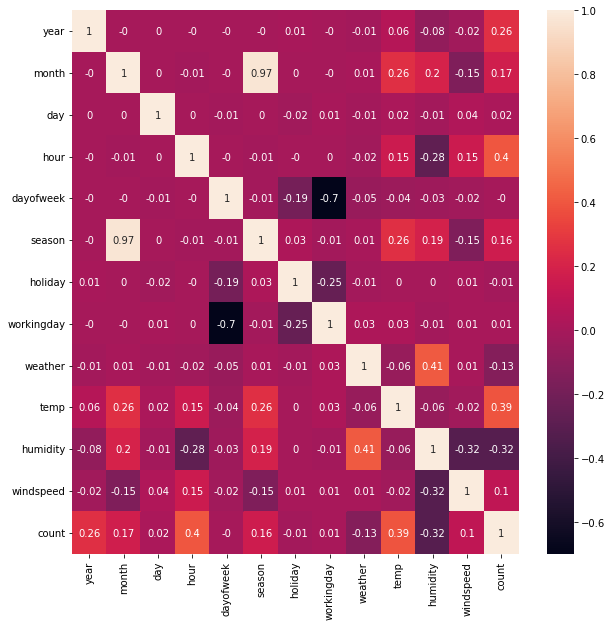

In [ ]:
plt.figure(figsize=(10,10))
bk_corr=bike_train_copy.corr().round(2)
bk_heatmap=sns.heatmap(data=bk_corr, annot=True )

### weather 날씨 재조정

In [ ]:
bike_train_copy["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
# #  weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#     2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#     3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#     4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [ ]:
bike_train_copy['weather']= np.where(bike_train_copy['weather']==1, 1, 0) #weather이 1이면==1(good), 아니면(2,3,4)==0(bad)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bike_train_copy['weather'].unique()

array([1, 0])

## 습도와 온도 이상치 구하기

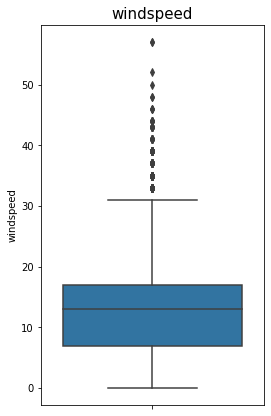

In [ ]:
#바람 이상치 그래프
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'windspeed', data = bike_train_copy)
plt.title('windspeed', size = 15)
plt.show()

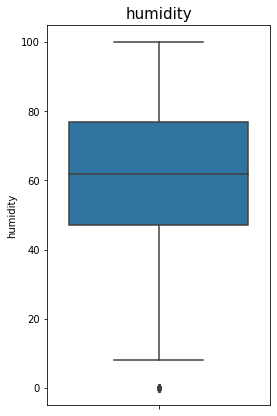

In [ ]:
#습도 이상치 그래프
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'humidity', data = bike_train_copy)
plt.title('humidity', size = 15)
plt.show()

In [ ]:
# 이상치 찾는 함수
def get_outlier(df=None, column=None):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 -q1
  outlier_idx  = df[column][(df[column] < q1 - (1.5 * iqr)) | (df[column] > q3 + (1.5 * iqr))].index
  return outlier_idx 

In [ ]:
outlier_idx = get_outlier(df=bike_train_copy, column='windspeed') #이상치 찾은 결과
outlier_idx

Int64Index([  175,   178,   194,   196,   265,   271,   471,   472,   473,
              474,
            ...
             9484,  9652,  9655,  9754,  9755, 10013, 10154, 10263, 10540,
            10853],
           dtype='int64', length=227)

In [ ]:
bike_train_copy.drop(outlier_idx, axis=0, inplace=True) #이상치 제거함수

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
outlier_idx = get_outlier(df=bike_train_copy, column='windspeed') #이상치 제거한 결과
outlier_idx

Int64Index([], dtype='int64')

In [ ]:
outlier_idx = get_outlier(df=bike_train_copy, column='humidity') # humidity 이상치 찾은 결과
outlier_idx

Int64Index([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
            1102, 1103, 1104, 1105, 1106, 1107, 1109, 1110, 1111, 1112],
           dtype='int64')

In [ ]:
bike_train_copy.drop(outlier_idx, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
outlier_idx = get_outlier(df=bike_train_copy, column='humidity') # humidity이상치 제거한 결과
outlier_idx

Int64Index([], dtype='int64')

In [ ]:
bike_train_copy

,year,month,day,hour,dayofweek,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011,1,1,0,5,1,0,0,1,9.84,81,0.0000,16
1,2011,1,1,1,5,1,0,0,1,9.02,80,0.0000,40
2,2011,1,1,2,5,1,0,0,1,9.02,80,0.0000,32
3,2011,1,1,3,5,1,0,0,1,9.84,75,0.0000,13
4,2011,1,1,4,5,1,0,0,1,9.84,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,2,4,0,1,1,15.58,50,26.0027,336
10882,2012,12,19,20,2,4,0,1,1,14.76,57,15.0013,241
10883,2012,12,19,21,2,4,0,1,1,13.94,61,15.0013,168
10884,2012,12,19,22,2,4,0,1,1,13.94,61,6.0032,129


### bike_test도 bike_train과 같은 형식으로, count만 빼고 일치시키기

In [ ]:
bike_test_copy=bike_test.copy()

In [ ]:
bike_test_copy["datetime"] = pd.to_datetime(bike_test_copy["datetime"])

In [ ]:
bike_test_copy["year"]=bike_test_copy["datetime"].dt.year #년
bike_test_copy["month"]=bike_test_copy["datetime"].dt.month #월
bike_test_copy["day"]=bike_test_copy["datetime"].dt.day #일
bike_test_copy["hour"]=bike_test_copy["datetime"].dt.hour #시간
bike_test_copy["dayofweek"]=bike_test_copy["datetime"].dt.weekday #요일

In [ ]:
bike_test_copy.drop(["atemp","datetime"], axis=1) #필요없는 컬럼 삭제
bike_test_copy=bike_test_copy[['year',	"month"	,'day',	'hour',	'dayofweek',"season",	"holiday",	"workingday",	"weather",	"temp",	"humidity",	'windspeed']]
# 컬럼위치 재조정 

In [ ]:
X_ohe=pd.get_dummies(X,columns=['year'])
X_ohe

,month,day,hour,dayofweek,season,holiday,workingday,weather,temp,humidity,windspeed,year_2011,year_2012
0,1,1,0,5,1,0,0,1,9.84,81,0.0000,1,0
1,1,1,1,5,1,0,0,1,9.02,80,0.0000,1,0
2,1,1,2,5,1,0,0,1,9.02,80,0.0000,1,0
3,1,1,3,5,1,0,0,1,9.84,75,0.0000,1,0
4,1,1,4,5,1,0,0,1,9.84,75,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12,19,19,2,4,0,1,1,15.58,50,26.0027,0,1
10882,12,19,20,2,4,0,1,1,14.76,57,15.0013,0,1
10883,12,19,21,2,4,0,1,1,13.94,61,15.0013,0,1
10884,12,19,22,2,4,0,1,1,13.94,61,6.0032,0,1


In [ ]:
bike_test_copy

,year,month,day,hour,dayofweek,season,holiday,workingday,weather,temp,humidity,windspeed
0,2011,1,20,0,3,1,0,1,1,10.66,56,26.0027
1,2011,1,20,1,3,1,0,1,1,10.66,56,0.0000
2,2011,1,20,2,3,1,0,1,1,10.66,56,0.0000
3,2011,1,20,3,3,1,0,1,1,10.66,56,11.0014
4,2011,1,20,4,3,1,0,1,1,10.66,56,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012,12,31,19,0,1,0,1,2,10.66,60,11.0014
6489,2012,12,31,20,0,1,0,1,2,10.66,60,11.0014
6490,2012,12,31,21,0,1,0,1,1,10.66,60,11.0014
6491,2012,12,31,22,0,1,0,1,1,10.66,56,8.9981


In [ ]:
bike_train_copy

,year,month,day,hour,dayofweek,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011,1,1,0,5,1,0,0,1,9.84,81,0.0000,16
1,2011,1,1,1,5,1,0,0,1,9.02,80,0.0000,40
2,2011,1,1,2,5,1,0,0,1,9.02,80,0.0000,32
3,2011,1,1,3,5,1,0,0,1,9.84,75,0.0000,13
4,2011,1,1,4,5,1,0,0,1,9.84,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,2,4,0,1,1,15.58,50,26.0027,336
10882,2012,12,19,20,2,4,0,1,1,14.76,57,15.0013,241
10883,2012,12,19,21,2,4,0,1,1,13.94,61,15.0013,168
10884,2012,12,19,22,2,4,0,1,1,13.94,61,6.0032,129


## 지금까지 배운 선형회귀,경사하강법, 릿지, 라쏘모형을 이용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X=bike_train_copy.drop(["count"], axis=1) #count빼고 전부
y=bike_train_copy["count"] #count만

In [ ]:
X_test= bike_test_copy #test에는 test_copy를 넣어줌

In [ ]:
y=y.ravel()

In [ ]:
X.shape, y.shape

((10638, 12), (10638,))

In [ ]:
# bike_train 의 데이터 내에서 Train, val 나누기
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Standard Scaler
# from sklearn.preprocessing import StandardScaler
# Scaler = StandardScaler()
# Scaler.fit(X_train)
# X_train_Scaler = Scaler.transform(X_train)
# X_val_Scaler = Scaler.transform(X_val)

In [ ]:
# X_train_Scaler

In [ ]:
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
# Linear Regression Fitting
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
lin_reg = LinearRegression()
sgd_reg=SGDRegressor()
ridge_reg = Ridge(alpha=1)
lasso_reg = Lasso(alpha=1)
elastic_net =ElasticNet(alpha=1, l1_ratio=0.5)
forest_reg = RandomForestRegressor(max_depth=2)


In [ ]:
for reg in [lin_reg, sgd_reg, ridge_reg, lasso_reg, elastic_net, forest_reg ]:
    reg.fit(X_train, y_train)
    predict = reg.predict(X_val)
    print(reg.__class__.__name__, 
          "r2_score :", r2_score(y_val, predict),
          "mse : ", mean_squared_error(y_val,predict))

LinearRegression r2_score : 0.4082418443239174 mse :  20046.620065596235
SGDRegressor r2_score : -2.1058557098287986e+25 mse :  7.13387537171727e+29
Ridge r2_score : 0.40823791924683417 mse :  20046.75303297195
Lasso r2_score : 0.4072456375119806 mse :  20080.367939240394
ElasticNet r2_score : 0.3829419031814597 mse :  20903.690311101083
RandomForestRegressor r2_score : 0.45325226472755376 mse :  18521.830270695016


# MSE값 무슨일..?

In [ ]:
X

,year,month,day,hour,dayofweek,season,holiday,workingday,weather,temp,humidity,windspeed
0,2011,1,1,0,5,1,0,0,1,9.84,81,0.0000
1,2011,1,1,1,5,1,0,0,1,9.02,80,0.0000
2,2011,1,1,2,5,1,0,0,1,9.02,80,0.0000
3,2011,1,1,3,5,1,0,0,1,9.84,75,0.0000
4,2011,1,1,4,5,1,0,0,1,9.84,75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,2,4,0,1,1,15.58,50,26.0027
10882,2012,12,19,20,2,4,0,1,1,14.76,57,15.0013
10883,2012,12,19,21,2,4,0,1,1,13.94,61,15.0013
10884,2012,12,19,22,2,4,0,1,1,13.94,61,6.0032


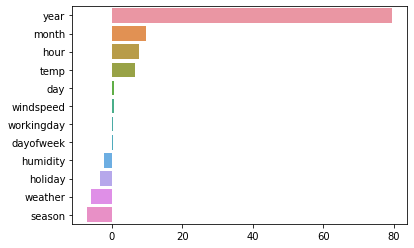

In [ ]:
coef = pd.Series(lin_reg.coef_ , index = X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)


#Rmsle 함수 사용해서 scroing 넣기

In [ ]:
from sklearn.metrics import make_scorer
def rmsle(y, y_,convertExp=False):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v +1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v +1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
rmsle_scorer=make_scorer(rmsle, greater_is_better=True)

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
sgd_reg=SGDRegressor()
ridge_reg = Ridge(alpha=1)
lasso_reg = Lasso(alpha=1)
elastic_net =ElasticNet(alpha=1, l1_ratio=0.5)
forest_reg = RandomForestRegressor(max_depth=2)

for reg in [lin_reg, ridge_reg, lasso_reg, elastic_net, forest_reg]:
  r2_score = cross_val_score(reg, X, y, scoring="r2", cv=5)
  rmsle_score = cross_val_score(reg, X, y, scoring=rmsle_scorer, cv=5)
  print(reg.__class__.__name__, 
          "r2_score : ", r2_score.mean(),
          "rmsle_score : ", rmsle_score.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


LinearRegression r2_score :  0.2196024534218443 rmsle_score :  1.3784649233794632
Ridge r2_score :  0.21966108282633642 rmsle_score :  1.3780072839420836


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


Lasso r2_score :  0.2272595548571462 rmsle_score :  1.3609969052507978


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


ElasticNet r2_score :  0.139503313882679 rmsle_score :  1.2892636780839222
RandomForestRegressor r2_score :  -0.1329874653684841 rmsle_score :  0.9613866799022563


In [ ]:
y

array([ 16,  40,  32, ..., 168, 129,  88])

## Log 변환

In [ ]:
print(y[y<0])

[]


In [ ]:
type(X)

pandas.core.frame.DataFrame

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


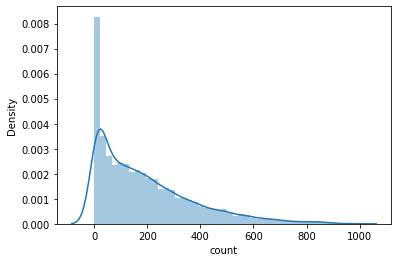

In [ ]:
sns.distplot(bike_train_copy['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


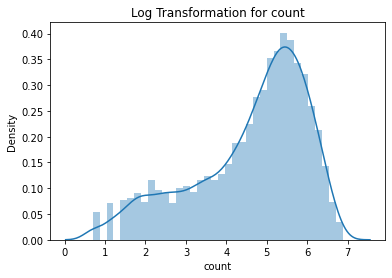

In [ ]:
plt.title('Log Transformation for count')
y_log = np.log1p(bike_train_copy['count'])
sns.distplot(y_log)

## 로그변환 시켜준 y값을 다시 넣어보기!

In [ ]:
# y_log
X=  bike_train_copy.drop(["count"], axis=1) #count빼고 전부
y = y_log
print(X.shape, y.shape)

(10638, 12) (10638,)


## 위 과정 반복

In [ ]:
from sklearn.metrics import make_scorer
def rmsle_T(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v +1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v +1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
rmsle_scorer_T=make_scorer(rmsle_T, greater_is_better=True)

In [ ]:
# bike_train 의 데이터 내에서 Train, val 나누기
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = LinearRegression()
sgd_reg=SGDRegressor()
ridge_reg = Ridge(alpha=1,random_state=42)
lasso_reg = Lasso(alpha=1,random_state=42)
elastic_net =ElasticNet(alpha=1, l1_ratio=0.5,random_state=42)
forest_reg = RandomForestRegressor(max_depth=2,random_state=42)

for reg in [lin_reg, ridge_reg, lasso_reg, elastic_net, forest_reg]:
  r2_score = cross_val_score(reg, X, y, scoring="r2", cv=5)
  rmsle_score = cross_val_score(reg, X, y, scoring=rmsle_scorer, cv=5)
  print(reg.__class__.__name__, 
          "r2_score : ", r2_score.mean(),
          "rmsle_score : ", rmsle_score.mean())

LinearRegression r2_score :  0.4418633994557079 rmsle_score :  0.23073904508747348
Ridge r2_score :  0.4418617048165288 rmsle_score :  0.23073973567484604
Lasso r2_score :  0.3347530646721622 rmsle_score :  0.2508929076233232
ElasticNet r2_score :  0.3465451873844783 rmsle_score :  0.24709664464326342
RandomForestRegressor r2_score :  0.5211356784958843 rmsle_score :  0.20351210441160122


In [ ]:
X_ohe = pd.get_dummies(X,columns=['hour'])

In [ ]:
X_ohe

,year,month,day,dayofweek,season,holiday,workingday,weather,temp,humidity,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2011,1,1,5,1,0,0,1,9.84,81,...,0,0,0,0,0,0,0,0,0,0
1,2011,1,1,5,1,0,0,1,9.02,80,...,0,0,0,0,0,0,0,0,0,0
2,2011,1,1,5,1,0,0,1,9.02,80,...,0,0,0,0,0,0,0,0,0,0
3,2011,1,1,5,1,0,0,1,9.84,75,...,0,0,0,0,0,0,0,0,0,0
4,2011,1,1,5,1,0,0,1,9.84,75,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,2,4,0,1,1,15.58,50,...,0,0,0,0,0,1,0,0,0,0
10882,2012,12,19,2,4,0,1,1,14.76,57,...,0,0,0,0,0,0,1,0,0,0
10883,2012,12,19,2,4,0,1,1,13.94,61,...,0,0,0,0,0,0,0,1,0,0
10884,2012,12,19,2,4,0,1,1,13.94,61,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = LinearRegression()
sgd_reg=SGDRegressor(random_state=42)
ridge_reg = Ridge(alpha=1,random_state=42)
lasso_reg = Lasso(alpha=1,random_state=42)
elastic_net =ElasticNet(alpha=1, l1_ratio=0.5,random_state=42)
forest_reg = RandomForestRegressor(max_depth=2,)

for reg in [lin_reg, ridge_reg, lasso_reg, elastic_net, forest_reg]:
  r2_score = cross_val_score(reg, X_ohe, y, scoring="r2", cv=5)
  rmsle_score = cross_val_score(reg, X_ohe, y, scoring=rmsle_scorer, cv=5)
  print(reg.__class__.__name__, 
          "r2_score : ", r2_score.mean(),
          "rmsle_score : ", rmsle_score.mean())

LinearRegression r2_score :  0.7989496941968686 rmsle_score :  0.14229790277903726
Ridge r2_score :  0.7989912608423849 rmsle_score :  0.14236175793897693
Lasso r2_score :  0.11995140701971334 rmsle_score :  0.28763703618342984
ElasticNet r2_score :  0.12667098504780988 rmsle_score :  0.28612958279949036
RandomForestRegressor r2_score :  0.19353587097481775 rmsle_score :  0.25538404345092414


In [ ]:
from sklearn.model_selection import GridSearchCV

params=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]}]
grid_search=GridSearchCV(lin_reg,params,cv=5,scoring=rmsle_scorer,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)

ValueError: ignored